In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu


/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_6590/2885108584.py:6: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all')
/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_6590/2885108584.py:6: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all')


## Compare morality values with another subreddit r/investing

### Load dataframes

In [3]:
selfimprovement = pd.read_csv("data_selfimprovement/cleaned_moral_scores.csv")
investing = pd.read_csv("data_to_compare/investing_liwc_cleaned.csv")

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_6590/2557467201.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  selfimprovement = pd.read_csv("data_selfimprovement/cleaned_moral_scores.csv")


In [4]:
# Set 'ID' as the index 
selfimprovement.set_index('id', inplace=True)
investing.set_index('id', inplace=True)

### Check for outliers 

In [5]:
selfimprovement.sort_values(by='moral', ascending=False)

,Unnamed: 0,type,extracted_link_id,author,year,month,cleaned_text,score,num_comments,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad,moral
id,,,,,,,,,,,,,,,
jxj3nli,465737,comment,15zvjh6,u/199_,2023.0,8.0,i didnt notice the rest of the comment its not...,1.0,NaN,0.00,3.28,0.0,0.0,0.0,16.39
h5x8vrz,273665,comment,onyjac,u/roba2686,2021.0,7.0,im still struggling to see your line of though...,1.0,NaN,0.00,0.00,0.0,0.0,0.0,14.81
jxpknqu,466330,comment,160ye0h,u/StimpakJunkie,2023.0,8.0,alcoholism and drug addiction are also not exc...,1.0,NaN,3.23,0.00,0.0,0.0,0.0,12.90
iyxkwtc,381461,comment,zcoabr,u/iamalext,2022.0,12.0,what happened was abominable but it was in no ...,1874.0,NaN,0.00,1.75,0.0,0.0,0.0,12.28
jilijyv,430398,comment,135u1g0,u/Stencil2,2023.0,5.0,start by trying to define these terms what ex...,1.0,NaN,1.75,0.00,0.0,0.0,0.0,12.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fiwjgkg,205064,comment,f99t1h,u/OldLadyT-RexArms,2020.0,2.0,it definitely helped me see things in a differ...,2.0,NaN,1.39,2.78,0.0,0.0,0.0,0.00
kfroq71,507608,comment,18u7fw8,u/TensionIndividual875,2023.0,12.0,do not do it save yourself for marriage do ...,1.0,NaN,0.00,0.00,0.0,0.0,0.0,0.00
17ih1ms,92279,submission,NaN,u/Amarylis9,2023.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
investing.sort_values(by='moral', ascending=False)

,Unnamed: 0,type,author,cleaned_text,score,num_comments,moral
id,,,,,,,
cjxw7zb,325221,comment,u/GetOffMyLawn_,dumb dumb dumb dumb dumb dumb dumb dumb dumb d...,3.0,NaN,100.00
jcyzen7,282438,comment,u/jasongw,tariffs are ridiculous regulations that entren...,2.0,NaN,10.91
dpea3jo,486312,comment,u/nyrangers30,ethics and morals arent really the same ethics...,0.0,NaN,10.45
e866m6t,268334,comment,u/Arsewipes,its because buying the sampp 500 over choosing...,2.0,NaN,10.39
d7v47om,153165,comment,u/lagerbaer,gt edit also another reason my dad thinks im w...,4.0,NaN,9.38
...,...,...,...,...,...,...,...
f81jw9l,184456,comment,u/Jairlyn,its stories like this that give me pause for i...,8.0,NaN,0.00
fzsg8uh,508002,comment,u/daynightcase,it happens to everyone if people can successfu...,1.0,NaN,0.00
5,35351,i dont know if you are being serious or just j...,NaN,NaN,NaN,NaN,NaN


Drop outlier

In [7]:
investing = investing.drop('cjxw7zb')

In [8]:
investing.sort_values(by='moral', ascending=False)

,Unnamed: 0,type,author,cleaned_text,score,num_comments,moral
id,,,,,,,
jcyzen7,282438,comment,u/jasongw,tariffs are ridiculous regulations that entren...,2.0,NaN,10.91
dpea3jo,486312,comment,u/nyrangers30,ethics and morals arent really the same ethics...,0.0,NaN,10.45
e866m6t,268334,comment,u/Arsewipes,its because buying the sampp 500 over choosing...,2.0,NaN,10.39
d7v47om,153165,comment,u/lagerbaer,gt edit also another reason my dad thinks im w...,4.0,NaN,9.38
e6qvpw3,352279,comment,u/sfw63,you are complete full of shit i am not uconnec...,-2.0,NaN,9.26
...,...,...,...,...,...,...,...
f81jw9l,184456,comment,u/Jairlyn,its stories like this that give me pause for i...,8.0,NaN,0.00
fzsg8uh,508002,comment,u/daynightcase,it happens to everyone if people can successfu...,1.0,NaN,0.00
5,35351,i dont know if you are being serious or just j...,NaN,NaN,NaN,NaN,NaN


### Analyses

Select series

In [9]:
selfimprovement_morality = selfimprovement['moral']
investing_morality = investing['moral']

#exclude rows with values of nan due to wrong parsing
selfimprovement_morality = selfimprovement_morality[~np.isnan(selfimprovement_morality)] 
investing_morality = investing_morality[~np.isnan(investing_morality)]

See stats

In [10]:
selfimprovement['moral'].describe()

count    507606.000000
mean          0.329382
std           0.699273
min           0.000000
25%           0.000000
50%           0.000000
75%           0.400000
max          16.390000
Name: moral, dtype: float64

In [11]:
mean_selfimprov = np.round((selfimprovement['moral'].mean()), 2)
max_selfimprov = np.round((selfimprovement['moral'].max()), 2)

In [12]:
quantiles_selfimprovement = selfimprovement['moral'].quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.99])  
print(quantiles_selfimprovement)

0.75    0.40
0.80    0.63
0.85    0.88
0.90    1.20
0.95    1.71
0.99    3.23
Name: moral, dtype: float64


In [13]:
investing['moral'].describe()

count    507999.000000
mean          0.200389
std           0.560619
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          10.910000
Name: moral, dtype: float64

In [14]:
mean_invs = np.round((investing['moral'].mean()), 2)
max_invs = np.round((investing['moral'].max()), 2)

In [15]:
quantiles_investing = investing['moral'].quantile([0.75, 0.80, 0.85, 0.90, 0.95, 0.99])  
print(quantiles_investing)

0.75    0.00
0.80    0.00
0.85    0.39
0.90    0.88
0.95    1.45
0.99    2.50
Name: moral, dtype: float64


Check variance

In [16]:
variance_A = selfimprovement['moral'].var()
variance_B = investing['moral'].var()

print(variance_A, variance_B)

0.4889823456117063 0.3142936070029139


Calculate difference between groups

In [17]:
# Perform Mann-Whitney U Test
stat, p = mannwhitneyu(selfimprovement_morality, investing_morality, alternative='greater')

print(f"Mann-Whitney U Statistic: {stat}")
print(f"P-value: {p:5f}")


Mann-Whitney U Statistic: 145155534325.0
P-value: 0.000000


### Create summary table

In [18]:
#Quantiles
summary = pd.concat([quantiles_selfimprovement, quantiles_investing], axis=1)
summary.columns = ['r/selfimprovement', 'r/investing']
summary.index = ["75 percentile", "80 percentile", "85 percentile", "90 percentile",
                 "95 percentile", "99 percentile"]

#Add mean
avg = pd.DataFrame({'r/selfimprovement': [mean_selfimprov], 'r/investing': [mean_invs]}, index = ["mean moral score"])

#Add max
max = pd.DataFrame({'r/selfimprovement': [max_selfimprov], 'r/investing': [max_invs]}, index = ["max moral score"])

#Combine
summary = pd.concat([avg, summary], ignore_index=False)
summary = pd.concat([summary, max], ignore_index=False)
summary

,r/selfimprovement,r/investing
mean moral score,0.33,0.20
75 percentile,0.40,0.00
80 percentile,0.63,0.00
85 percentile,0.88,0.39
90 percentile,1.20,0.88
95 percentile,1.71,1.45
99 percentile,3.23,2.50
max moral score,16.39,10.91


## Dig deeper into self improvement morality values

In [19]:
bin_0 = selfimprovement[selfimprovement.moral == 0.00]
bin_1 = selfimprovement[(selfimprovement.moral > 0.00) & (selfimprovement.moral < 0.28)]
bin_2 = selfimprovement[(selfimprovement.moral >= 0.28) & (selfimprovement.moral < 3.23)]
bin_3 = selfimprovement[(selfimprovement.moral >= 3.23)]


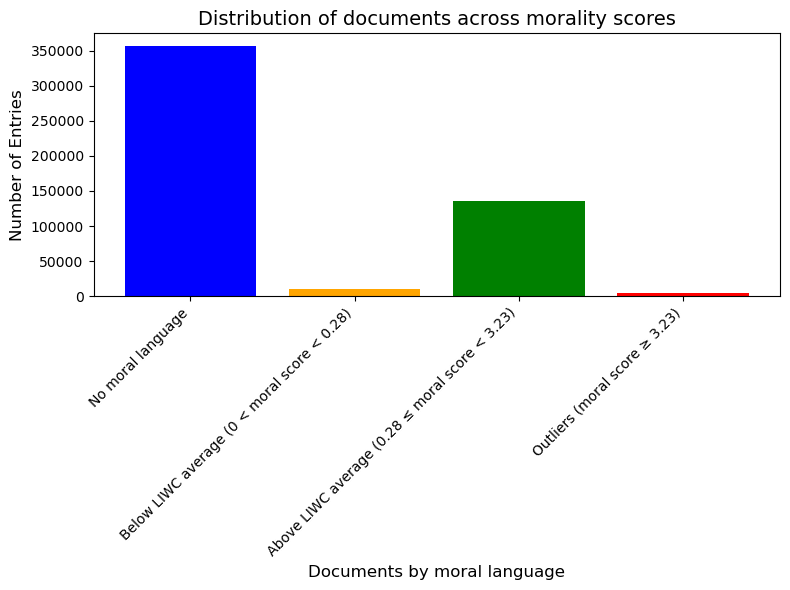

In [21]:
# Count the number of entries in each bin
bin_sizes = [bin.shape[0] for bin in [bin_0, bin_1, bin_2, bin_3]]

# Define bin labels
bin_labels = ['No moral language', 
              'Below LIWC average (0 < moral score < 0.28)', 
              'Above LIWC average (0.28 ≤ moral score < 3.23)', 
              'Outliers (moral score ≥ 3.23)']

# Create the bar plot
plt.figure(figsize=(8, 6))
plt.bar(bin_labels, bin_sizes, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Documents by moral language', fontsize=12)
plt.ylabel('Number of Entries', fontsize=12)
plt.title('Distribution of documents across morality scores', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Discourse tends to be more towards the extremes: either no moral language at all, or moral language above average